<a href="https://colab.research.google.com/github/mpartain1/sales-predictions/blob/main/FinalCopyBeltExamRetakeMarcus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn import set_config
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
set_config(display='diagram')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/Belt2_B_diabetes_v2_final.csv')
print(df.head())
print(df.info())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
0            4    189.0          110.0           31.0      NaN   
1            2    157.0           74.0           35.0    440.0   
2            6     98.0           58.0           33.0    190.0   
3            6    111.0           64.0           39.0      NaN   
4            3    106.0           72.0            NaN      NaN   

  DiabetesPedigreeFunction WeightGroup AgeGroup Gender  Outcome  
0                     0_68  overweight  18 - 44      F        0  
1                    0.134     obese_2  18 - 44      F        0  
2                     0.43     obese_1  18 - 44      F        0  
3                     0.26     obese_1  18 - 44      F        0  
4                    0_207  overweight  18 - 44      F        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  

Next, I attempt to change the data types according to the given data dictionary:

In [ ]:
df['WeightGroup'] = df['WeightGroup'].astype('string')
df['AgeGroup'] = df['AgeGroup'].astype('string')
df['Gender'] = df['Gender'].astype('string')
df['Glucose'] = df['Glucose'].astype('int64', errors = 'ignore')
df['BloodPressure'] = df['BloodPressure'].astype('int64', errors = 'ignore')
df['SkinThickness'] = df['SkinThickness'].astype('int64', errors = 'ignore')
df['Insulin'] = df['Insulin'].astype('int64', errors = 'ignore')
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].astype('float', errors = 'ignore')

In [ ]:
print(df.duplicated().sum())
print(df.drop_duplicates(keep = False, inplace = True))
print(df.duplicated().sum())


3
None
0


In [ ]:
print(df['Pregnancies'].value_counts())
df.drop(df.index[(df.Pregnancies > 15)], inplace = True)
print(df['Pregnancies'].value_counts())
#removes the 1000 impossible pregnancy value

1       107
0        93
2        87
3        60
4        55
5        44
6        41
7        41
8        31
9        25
10       21
11       10
13        9
12        8
14        2
1000      1
15        1
Name: Pregnancies, dtype: int64
1     107
0      93
2      87
3      60
4      55
5      44
6      41
7      41
8      31
9      25
10     21
11     10
13      9
12      8
14      2
15      1
Name: Pregnancies, dtype: int64


99.0     15
129.0    13
125.0    13
106.0    12
112.0    11
         ..
56.0      1
74.0      1
76.0      1
77.0      1
186.0     1
Name: Glucose, Length: 131, dtype: int64


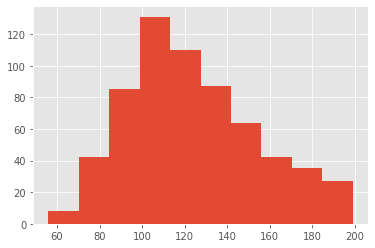

In [ ]:
print(df['Glucose'].value_counts())
plt.style.use('ggplot')
df['Glucose'].hist()
#We use this histogram to see if there are any extreme/unrealistic values, which there are not.

70.0     52
74.0     42
78.0     38
68.0     37
64.0     36
76.0     35
72.0     33
62.0     32
80.0     31
60.0     28
82.0     28
66.0     25
84.0     21
88.0     20
90.0     19
58.0     19
86.0     18
56.0     10
50.0      9
52.0      9
54.0      8
75.0      8
94.0      5
92.0      4
44.0      4
85.0      4
96.0      4
65.0      3
110.0     3
48.0      3
98.0      3
100.0     3
108.0     2
46.0      2
30.0      2
106.0     2
104.0     2
55.0      1
24.0      1
61.0      1
102.0     1
114.0     1
Name: BloodPressure, dtype: int64


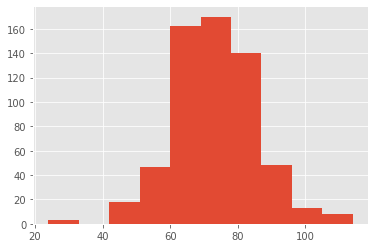

In [ ]:
print(df['BloodPressure'].value_counts())
plt.style.use('ggplot')
df['BloodPressure'].hist()
#We use this histogram to see if there are any extreme/unrealistic values, which there are not.

32.0    26
30.0    21
27.0    19
23.0    18
33.0    17
31.0    16
28.0    16
26.0    15
19.0    15
37.0    15
40.0    15
39.0    15
35.0    14
22.0    14
18.0    13
41.0    13
36.0    13
25.0    13
24.0    12
29.0    12
17.0    12
13.0    11
15.0     9
21.0     9
20.0     9
46.0     8
42.0     8
34.0     7
11.0     6
38.0     6
12.0     6
16.0     5
14.0     5
47.0     4
45.0     4
43.0     4
10.0     4
44.0     4
50.0     3
48.0     3
49.0     3
7.0      2
54.0     2
52.0     2
51.0     1
99.0     1
56.0     1
63.0     1
Name: SkinThickness, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


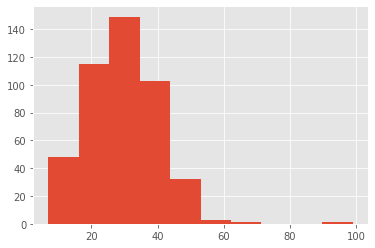

In [ ]:
print(df['SkinThickness'].value_counts())
plt.style.use('ggplot')
print(df['SkinThickness'].hist())
df.drop(df.index[(df.SkinThickness > 80)], inplace = True)

#We use this histogram to see if there are any extreme/unrealistic values.
#I dropped the values greater than 80 because they were far removed
#from the rest of the data and skewed the data unecessarily.

AxesSubplot(0.125,0.125;0.775x0.755)


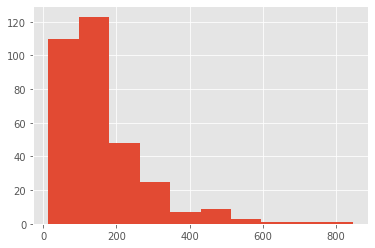

In [ ]:
df['Insulin'].value_counts()
plt.style.use('ggplot')
print(df['Insulin'].hist())
df.drop(df.index[(df.Insulin > 600)], inplace = True)

#We use this histogram to see if there are any extreme/unrealistic values.
#I dropped the values greater than 600 because they were far removed
#from the rest of the data and skewed the data unecessarily.


0.254    5
0.260    4
0.270    4
0.304    4
0.197    4
        ..
0.564    1
0.598    1
0.154    1
0.126    1
2.420    1
Name: DiabetesPedigreeFunction, Length: 464, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


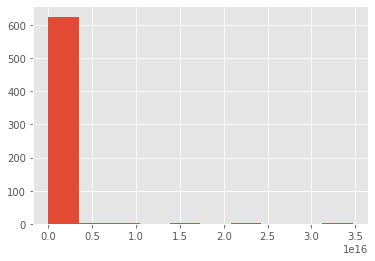

In [ ]:
print(df['DiabetesPedigreeFunction'].value_counts())
plt.style.use('ggplot')
print(df['DiabetesPedigreeFunction'].hist())
df.drop(df.index[(df.DiabetesPedigreeFunction > 1)], inplace = True)

#There were some extreme values that skewed the data in this column,
#they were extremely far away from the bulk of the data relatively,
#so I had to delete these rows and used the histogram to test different
#thresholds until I removed all the impossible/unreasonable data points.





In [ ]:
print(df['WeightGroup'].value_counts())
df.replace({'obsese_3': 'obese_3'}, regex = True, inplace = True)
print(df['WeightGroup'].value_counts())

obese_1           174
overweight        125
obese_2           116
healthy weight     71
obsese_3           69
MISSING             6
underweight         4
Name: WeightGroup, dtype: Int64
obese_1           174
overweight        125
obese_2           116
healthy weight     71
obese_3            69
MISSING             6
underweight         4
Name: WeightGroup, dtype: Int64


In [ ]:
print(df['AgeGroup'].value_counts())
df.loc[df['AgeGroup'] == '<65', 'AgeGroup'] = '>65'
print(df['AgeGroup'].value_counts())

18 - 44    470
45 - 64     84
>65          8
<65          3
Name: AgeGroup, dtype: Int64
18 - 44    470
45 - 64     84
>65         11
Name: AgeGroup, dtype: Int64


In [ ]:
df['Gender'] = df['Gender'].replace('m', 'M')
df['Gender'].value_counts()
#Here I replaced the m with M to get consistent categorical data.

F    497
M     68
Name: Gender, dtype: Int64

In [ ]:
df['Outcome'].value_counts()

0    341
1    224
Name: Outcome, dtype: int64

In [ ]:
y = df['Outcome']
X = df.drop(columns=['Outcome'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X.isna().any()

Pregnancies                 False
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
DiabetesPedigreeFunction    False
WeightGroup                 False
AgeGroup                    False
Gender                      False
dtype: bool

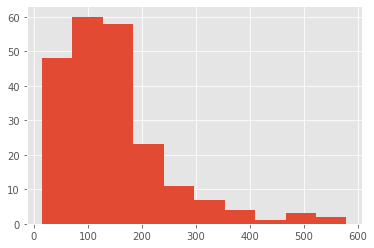

In [ ]:
plt.style.use('ggplot')
X_train['Insulin'].hist()

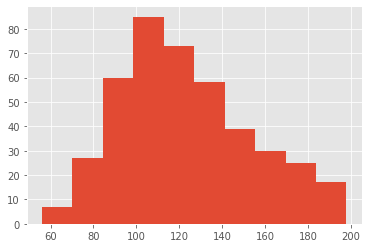

In [ ]:
plt.style.use('ggplot')
X_train['Glucose'].hist()

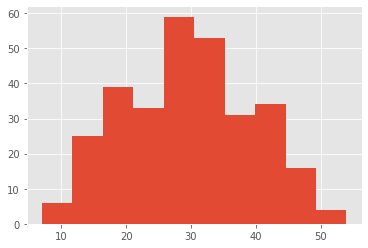

In [ ]:
plt.style.use('ggplot')
X_train['SkinThickness'].hist()

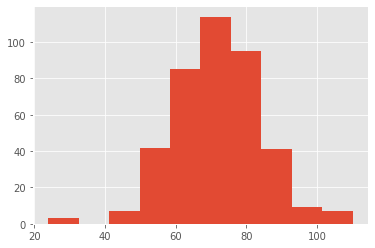

In [ ]:
plt.style.use('ggplot')
X_train['BloodPressure'].hist()

The four visualizations above show us the respective distributions of each of the columns containing missing values in our training data.  They show that the 'Glucose', 'SkinThickness', and 'BloodPressure' columns from the training set are not very skewed and follow the typical bell curve look.  However, the 'Insulin' column does not follow this typical distribution as much.

In [ ]:
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')
mean_imputer = SimpleImputer(strategy='mean')
med_imputer = SimpleImputer(strategy = 'median')
med_imputer.fit(X_train[['Insulin']])
mean_imputer.fit(X_train[['SkinThickness', 'BloodPressure', 'Glucose']])
X_train.loc[:, ['Insulin']] = med_imputer.transform(X_train[['Insulin']])
X_train.loc[:, ['SkinThickness', 'BloodPressure', 'Glucose']] = mean_imputer.transform(X_train[['SkinThickness', 'BloodPressure', 'Glucose']])
X_test.loc[:, ['Insulin']] = med_imputer.transform(X_test[['Insulin']])
X_test.loc[:, ['SkinThickness', 'BloodPressure', 'Glucose']] = mean_imputer.transform(X_test[['SkinThickness', 'BloodPressure', 'Glucose']])
print(X_train.isna().any())
print(X_test.isna().any())

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
DiabetesPedigreeFunction    False
WeightGroup                 False
AgeGroup                    False
Gender                      False
dtype: bool
Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
DiabetesPedigreeFunction    False
WeightGroup                 False
AgeGroup                    False
Gender                      False
dtype: bool


I imputed missing values from the 'Isulin' column with its median value because from looking at the histogram distribution of this column, it appears to be skewed, in which case it is beneficial to look at the median as more representative of a central typical value in the data.  I imputed missing values from 'SkinThickness', 'BloodPressure', and 'Glucose' columns with their mean values because these histograms, as shown above, were not very skewed, indicating that the mean would be a better measurement of a central typical value for those columns.

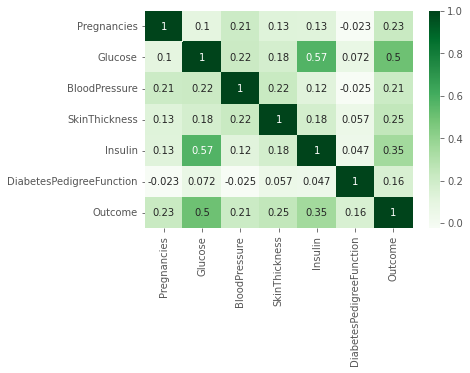

In [ ]:
corr=df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True)

From this correlation heatmap, we can see that the most correlated variables are Insulin and Glucose.  Of more importance, however, we can see that the most correlated variable with Outcome appears to be Glucose, with a correlation of 0.52.  The second most correlated variable with Outcome is Insulin at 0.37.

In [ ]:
# Define a dictionary for encoding our variables
weights = ["MISSING", "underweight", "healthy weight", "overweight", "obese_1", "obese_2", "obese_3"]
ages = ["18 - 44", "45 - 64", ">65"]
gender = ["M", "F"]

In [ ]:
categoricals = list(X_train.select_dtypes('string').columns)
numericals = list(X_train.select_dtypes(exclude=['string']).columns)
col_transformer = ColumnTransformer(transformers = [('ordinal_encoder', OrdinalEncoder(categories = [weights, ages, gender], handle_unknown = 'error'), categoricals), 
                                                    ('scaler', StandardScaler(), numericals)])
log_reg_pipe = Pipeline(steps = [
                                 ("col_transformer", col_transformer),
                                 ("model", LogisticRegression(random_state = 42))
])
log_reg_pipe

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(transformers=[('ordinal_encoder',
                                                  OrdinalEncoder(categories=[['MISSING',
                                                                              'underweight',
                                                                              'healthy '
                                                                              'weight',
                                                                              'overweight',
                                                                              'obese_1',
                                                                              'obese_2',
                                                                              'obese_3'],
                                                                             ['18 '
                                                                              '- '
                                                                              '44',
                                                                              '45 '
                                                                              '- '
                                                                              '64',
                                                                              '>65'],
                                                                             ['M',
                                                                              'F']]),
                                                  ['WeightGroup', 'AgeGroup',
                                                   'Gender']),
                                                 ('scaler', StandardScaler(),
                                                  ['Pregnancies', 'Glucose',
                                                   'BloodPressure',
                                                   'SkinThickness', 'Insulin',
                                                   'DiabetesPedigreeFunction'])])),
                ('model', LogisticRegression(random_state=42))])

I encoded my categorial data with an ordinal encoder because the data does have a particular order.  Looking at the WeightGroup column, the data dictionary tells us that the the groups are based on the CDC's ordering of people from underweight as the lowest rank to obesity_3 at the top.  Furthermore, the AgeGroup column clearly has an ordering to it as well from youngest to oldest.

Below I check the three primary metrics of categorical models, including recall, accuracy, and precision, for my initial default logistic regression model.

In [ ]:
log_recalls_1 = cross_val_score(log_reg_pipe, X_train, y_train, scoring = "recall", cv=5)
log_accuracies_1 = cross_val_score(log_reg_pipe, X_train, y_train, cv=5)
log_precisions_1 = cross_val_score(log_reg_pipe, X_train, y_train, scoring = "precision", cv=5)

print(f'Recall scores for each fold are: {log_recalls_1.round(2)}')
print(f'Average recall across folds is {np.mean(log_recalls_1)}')
print(f'Accuracy scores for each fold are: {log_accuracies_1.round(2)}')
print(f'Average accuracy across folds is {np.mean(log_accuracies_1)}')
print(f'Precision scores for each fold are: {log_precisions_1.round(2)}')
print(f'Average precision across folds is {np.mean(log_precisions_1)}')

Recall scores for each fold are: [0.69 0.61 0.69 0.66 0.51]
Average recall across folds is 0.6325396825396825
Accuracy scores for each fold are: [0.76 0.73 0.76 0.74 0.74]
Average accuracy across folds is 0.7470028011204481
Precision scores for each fold are: [0.73 0.71 0.74 0.7  0.78]
Average precision across folds is 0.7303645313792991


Next, I run a confusion matrix to assess which metric specifically I need to focus on improving...

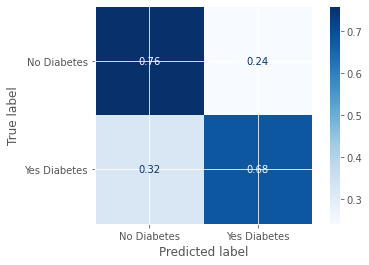

In [ ]:
log_reg_pipe.fit(X_train, y_train)
ylog1 = log_reg_pipe.predict(X_test)
labels = ['No Diabetes', 'Yes Diabetes']
ConfusionMatrixDisplay.from_predictions(y_test, ylog1, display_labels=labels, cmap='Blues', normalize='true')


The worst case scenario would be a false negative, where somebody is told they do not have diabetes when indeed they do.  This meight lead people to not obtian the necessary treatment and care they need and may even result in death.  We need to tune our parameters to reduce the number of false negatives as much as we can.  These are known as type II errors, and improving the recall metric is the best way to address this.

Next, I will go through the same process as above but for a different KNN model.

In [ ]:
knn_pipe = Pipeline(steps = [
                                 ("col_transformer", col_transformer),
                                 ("model", KNeighborsClassifier(n_neighbors = 2))
])
knn_pipe

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(transformers=[('ordinal_encoder',
                                                  OrdinalEncoder(categories=[['MISSING',
                                                                              'underweight',
                                                                              'healthy '
                                                                              'weight',
                                                                              'overweight',
                                                                              'obese_1',
                                                                              'obese_2',
                                                                              'obese_3'],
                                                                             ['18 '
                                                                              '- '
                                                                              '44',
                                                                              '45 '
                                                                              '- '
                                                                              '64',
                                                                              '>65'],
                                                                             ['M',
                                                                              'F']]),
                                                  ['WeightGroup', 'AgeGroup',
                                                   'Gender']),
                                                 ('scaler', StandardScaler(),
                                                  ['Pregnancies', 'Glucose',
                                                   'BloodPressure',
                                                   'SkinThickness', 'Insulin',
                                                   'DiabetesPedigreeFunction'])])),
                ('model', KNeighborsClassifier(n_neighbors=2))])

Below are the metrics of recall, accuracy, and precision for my default KNN model.

In [ ]:
knn_recalls_1 = cross_val_score(knn_pipe, X_train, y_train, scoring = "recall", cv=5)
knn_accuracies_1 = cross_val_score(knn_pipe, X_train, y_train, cv=5)
knn_precisions_1 = cross_val_score(knn_pipe, X_train, y_train, scoring = "precision", cv=5)

print(f'Recall scores for each fold are: {knn_recalls_1.round(2)}')
print(f'Average recall across folds is {np.mean(knn_recalls_1)}')
print(f'Accuracy scores for each fold are: {knn_accuracies_1.round(2)}')
print(f'Average accuracy across folds is {np.mean(knn_accuracies_1)}')
print(f'Precision scores for each fold are: {knn_precisions_1.round(2)}')
print(f'Average precision across folds is {np.mean(knn_precisions_1)}')

Recall scores for each fold are: [0.34 0.36 0.47 0.49 0.37]
Average recall across folds is 0.4066666666666666
Accuracy scores for each fold are: [0.65 0.66 0.71 0.73 0.64]
Average accuracy across folds is 0.6761624649859944
Precision scores for each fold are: [0.63 0.68 0.74 0.77 0.62]
Average precision across folds is 0.6893389600483422


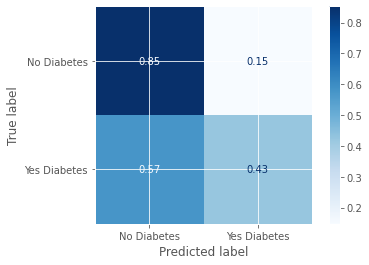

In [ ]:
knn_pipe.fit(X_train, y_train)
yknn1 = knn_pipe.predict(X_test)
labels = ['No Diabetes', 'Yes Diabetes']
ConfusionMatrixDisplay.from_predictions(y_test, yknn1, display_labels=labels, cmap='Blues', normalize='true')


As we can see again, type II errors are heavily present and need to be reduced by improving the recall of our model.

We will begin by trying to improve the recall on our logistic regression model:

{0.0001: 0.0,
 0.001: 0.06793650793650793,
 0.01: 0.5534920634920635,
 0.1: 0.6157142857142857,
 1: 0.6325396825396825,
 10: 0.638095238095238,
 100: 0.6438095238095238,
 1000: 0.6438095238095238}

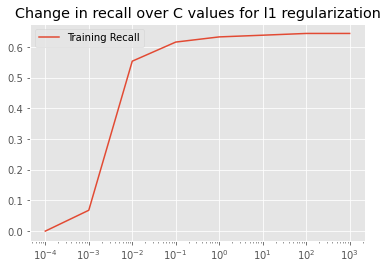

In [ ]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
bestrecall = 0
#iterative over the c values
for c in c_values:
 
  # establish a dummy log_reg_pipe function to test different c values
  log_reg_pipe_dummy = Pipeline(steps = [
                                  ("col_transformer", col_transformer),
                                  ("model", LogisticRegression(C=c, random_state = 42))
  ])
  rec_scores = cross_val_score(log_reg_pipe_dummy, X_train, y_train, scoring='recall', cv=5)
  train_scores.append(np.mean(rec_scores))
  #if recall for this k is better than previous accuracies, set bestk = k
  if np.mean(rec_scores) > bestrecall:
    bestrecall = np.mean(rec_scores)
    bestc = c
 
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Recall')
ax.set_xticks(c_values)
ax.set_title('Change in recall over C values for l1 regularization')
ax.legend()
 
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, train_scores)}

From here can can see that the best average recall score is obtained 0.64308 when C = 10.  Below are the classification metrics for the updated logistic regression model for when C = 10:

In [ ]:
log_reg_pipe_best = Pipeline(steps = [
                                 ("col_transformer", col_transformer),
                                 ("model", LogisticRegression(C = 10, random_state = 42))
])
log_reg_pipe_best.fit(X_train, y_train)
ylog2 = log_reg_pipe_best.predict(X_test)

log_recalls_2 = cross_val_score(log_reg_pipe_best, X_train, y_train, scoring = "recall", cv=5)
log_accuracies_2 = cross_val_score(log_reg_pipe_best, X_train, y_train, cv=5)
log_precisions_2 = cross_val_score(log_reg_pipe_best, X_train, y_train, scoring = "precision", cv=5)

print(f'Recall scores for each fold are: {log_recalls_2.round(2)}')
print(f'Average recall across folds is {np.mean(log_recalls_2)}')
print(f'Accuracy scores for each fold are: {log_accuracies_2.round(2)}')
print(f'Average accuracy across folds is {np.mean(log_accuracies_2)}')
print(f'Precision scores for each fold are: {log_precisions_2.round(2)}')
print(f'Average precision across folds is {np.mean(log_precisions_2)}')



Recall scores for each fold are: [0.69 0.64 0.69 0.66 0.51]
Average recall across folds is 0.638095238095238
Accuracy scores for each fold are: [0.75 0.75 0.76 0.74 0.74]
Average accuracy across folds is 0.7493557422969188
Precision scores for each fold are: [0.71 0.74 0.74 0.7  0.78]
Average precision across folds is 0.7325380694162147


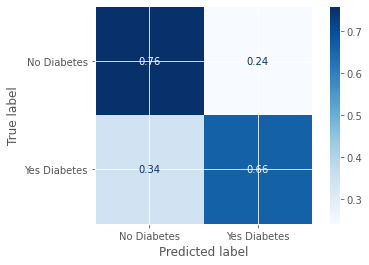

In [ ]:
labels = ['No Diabetes', 'Yes Diabetes']
ConfusionMatrixDisplay.from_predictions(y_test, ylog2, display_labels=labels, cmap='Blues', normalize='true')


We will now look at the KNN model and seek to minimize Type II errors by improving recall.  

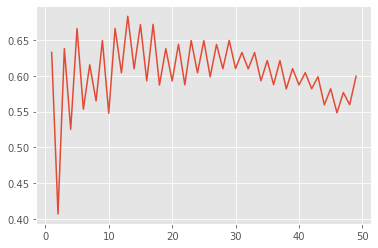

Best K value is 13 
with 0.6834920634920636 recall on the test set


In [ ]:
krange = range(1, 50)
train_recalls = []
bestrecall = 0
bestk = 0
for k in krange:
  #find accuracy for each k
  knn_dummy = Pipeline(steps = [
                                  ("col_transformer", col_transformer),
                                  ("model", KNeighborsClassifier(n_neighbors = k))
  ])
  rec_scores = cross_val_score(knn_dummy, X_train, y_train, scoring='recall', cv=5)
  train_recalls.append(np.mean(rec_scores))
  #if recall for this k is better than previous accuracies, set bestk = k
  if np.mean(rec_scores) > bestrecall:
    bestrecall = np.mean(rec_scores)
    bestk = k

#plot rcalls over K
plt.plot(krange, train_recalls, label='Test K Scores')
plt.show()

#print best k and best recall
print(f'Best K value is {bestk} \nwith {bestrecall} recall on the test set')

From here we can deduce that the best k value is 9, leading to an average recall of 0.658.  Below are the classification metrics for the updated KNN model with a k value of 9:

In [ ]:
knn_pipe_best = Pipeline(steps = [
                                 ("col_transformer", col_transformer),
                                 ("model", KNeighborsClassifier(n_neighbors = 9))
])
knn_pipe_best.fit(X_train, y_train)
yknn2 = knn_pipe_best.predict(X_test)

knn_recalls_2 = cross_val_score(knn_pipe_best, X_train, y_train, scoring = "recall", cv=5)
knn_accuracies_2 = cross_val_score(knn_pipe_best, X_train, y_train, cv=5)
knn_precisions_2 = cross_val_score(knn_pipe_best, X_train, y_train, scoring = "precision", cv=5)

print(f'Recall scores for each fold are: {knn_recalls_2.round(2)}')
print(f'Average recall across folds is {np.mean(knn_recalls_2)}')
print(f'Accuracy scores for each fold are: {knn_accuracies_2.round(2)}')
print(f'Average accuracy across folds is {np.mean(knn_accuracies_2)}')
print(f'Precision scores for each fold are: {knn_precisions_2.round(2)}')
print(f'Average precision across folds is {np.mean(knn_precisions_2)}')

Recall scores for each fold are: [0.69 0.67 0.67 0.69 0.54]
Average recall across folds is 0.6495238095238095
Accuracy scores for each fold are: [0.78 0.74 0.69 0.73 0.68]
Average accuracy across folds is 0.7233053221288517
Precision scores for each fold are: [0.75 0.71 0.63 0.67 0.63]
Average precision across folds is 0.6774922600619195


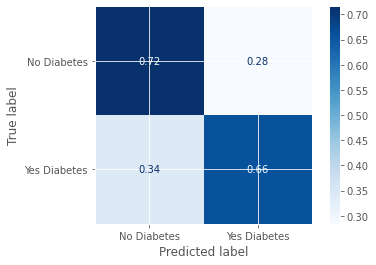

In [ ]:
labels = ['No Diabetes', 'Yes Diabetes']
ConfusionMatrixDisplay.from_predictions(y_test, yknn2, display_labels=labels, cmap='Blues', normalize='true')


Thus, we can see that from the hypertuning, both models experienced an improvement in their respective recall scores.

My final model recommendation is the hypertuned logistic regression model.  This is because between both hypertuned models, the type II error rate is the same on the respective cofusion matrices, so we cannot decide simply based on the type II error rate.  Type II errors in this case are the worst mistake because it is equivalent to telling a patient that they do no have diabetes when in fact they do.  This may result in serious harm that comes from not obtaining the proper treatment, and we want to avoid these errors the most.  Although the KNN hypertuned model has a better recall score, the logistic regression model is better in the other two scores of accuracy and precision. As a result, the hypertuned logistic regression model is best to use. 

Some of my Sources Referenced Include: Learn Platform, Stack Overflow, Geeks for Geeks, Medium, and the following links:

https://statisticsglobe.com/convert-float-integer-pandas-dataframe-column-python

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html

https://duckduckgo.com/?q=what+is+diabetes+pedigree+function&t=brave&ia=web

https://priyanka-ddit.medium.com/handle-unknown-categories-using-onehotencoder-181bdc0a163c

https://pythonprinciples.com/blog/lists-of-strings-in-python/